![Imgur](https://i.imgur.com/h4PPC71.png)
#**18-modul. Amaliyot. Customer Churn**
# 18.6. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifa orqali data sayns jarayoni:**

✔️ maʼlumot tayyorlash;

  ✔️ model qurish;

  ✔️ baholash;

  ✔️ natijalarni tahlil qilish
  kabi koʻnikmalarga ega boʻlasiz.

#**Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**

Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yarating:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblang:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlang.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.
---

###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [ ]:
import pandas as pd
import numpy as np
import sklearn

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')

In [ ]:
# Javobni shu yerda yozing.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score
from sklearn import metrics
from sklearn.cluster import KMeans

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop(['CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
df.groupby('Exited')['IsActiveMember'].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: count, dtype: int64

In [ ]:
df.groupby('Exited')['HasCrCard'].value_counts()

Exited  HasCrCard
0       1            5631
        0            2332
1       1            1424
        0             613
Name: count, dtype: int64

In [ ]:
df.groupby('Exited')['Geography'].value_counts()

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: count, dtype: int64

In [ ]:
df.groupby('Exited')['NumOfProducts'].value_counts()

Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: count, dtype: int64

In [ ]:
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df.corrwith(df['Exited']).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285323
IsActiveMember,0.156128
Balance,0.118533
Gender,0.106512
NumOfProducts,0.047820
Geography,0.035943
CreditScore,0.027094
Tenure,0.014001
EstimatedSalary,0.012097


In [ ]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [ ]:
y_test.value_counts()

,count
Exited,
0,1616
1,384


# XGB

Model aniqligi:  0.866
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1616
           1       0.70      0.53      0.60       384

    accuracy                           0.87      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000

[[1527   89]
 [ 179  205]]


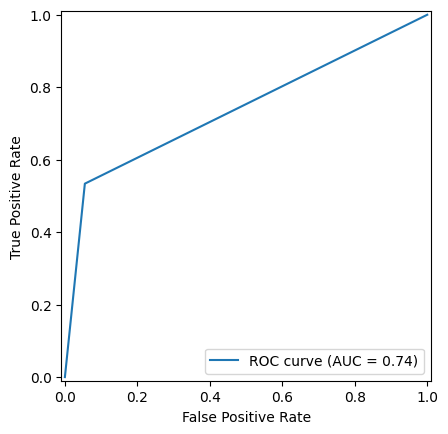

In [ ]:
xbg_model = XGBClassifier()
xbg_model.fit(x_train, y_train)

y_pre = xbg_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pre))
print(classification_report(y_test, y_pre))
print(confusion_matrix(y_test, y_pre))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pre)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# DECISION TREE

Model aniqligi:  0.7855
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1616
           1       0.45      0.52      0.48       384

    accuracy                           0.79      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

[[1373  243]
 [ 186  198]]


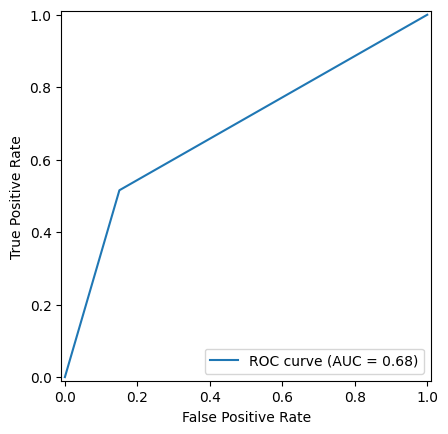

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

y_predict = tree_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# LOGISTIC REGRESSION

Model aniqligi:  0.7995
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1616
           1       0.45      0.20      0.28       384

    accuracy                           0.80      2000
   macro avg       0.64      0.57      0.58      2000
weighted avg       0.76      0.80      0.77      2000

[[1522   94]
 [ 307   77]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


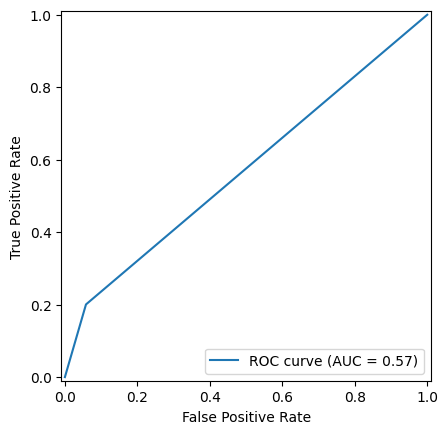

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

y_predicttt = lg_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_predicttt))
print(classification_report(y_test, y_predicttt))
print(confusion_matrix(y_test, y_predicttt))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicttt)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# RANDOM FOREST

Model aniqligi:  0.8755
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1616
           1       0.77      0.50      0.61       384

    accuracy                           0.88      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.87      0.88      0.86      2000

[[1559   57]
 [ 192  192]]


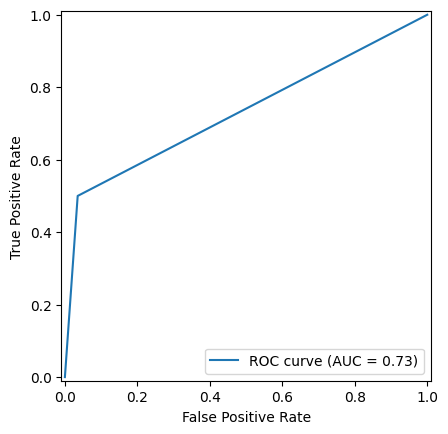

In [ ]:
random_model = RandomForestClassifier(random_state=42)
random_model.fit(x_train, y_train)

y_pred = random_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# SUPPORT VECTOR MACHINE

Model aniqligi:  0.872
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1616
           1       0.76      0.48      0.59       384

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

[[1559   57]
 [ 199  185]]


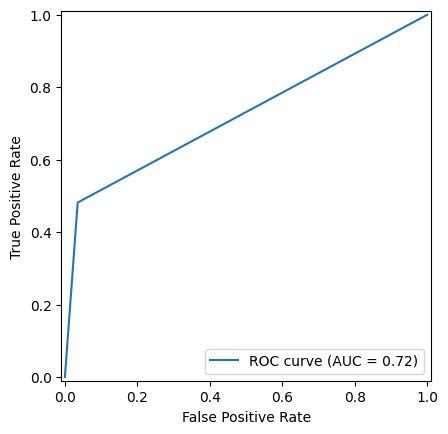

In [ ]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

y_p = random_model.predict(x_test)

print("Model aniqligi: ", accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))
print(confusion_matrix(y_test, y_p))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_p)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# YAKUNIY TAHLIL

MIJOZLARNI BANKDAN KETISH KO'RSATGICHINI BASHORAT QILUVCHI MODEL YARATDIM. USHBU MODELNI 5 XIL USULDA TUZIB KO'RDIM. ENG YAXSHI NATIJA RANDOM FOREST ALGORITMI ORQALI TUZILGANI BO'LDI. MODEL ANIQLIGI 0,875 YA'NI 87,5%.

BANKGA BERADIGAN MASLAHATLARIM :

1) 3 TA DAVLATDAN MIJOZLAR BOR EKAN. GERMANIYALIK MIJOZLARGA KO'PROQ E'TIBOR QARATISH KERAK. CHUNKI ENG KO'P KETIB QOLGAN MIJOZLAR SHU DAVLATNING AHOLISI.

2) FAQAT 1 TA MAHSULOTDAN FOYDALANADIGAN MIJOZLAR YAQQOL AJRALIB TURIBDI. 1800 NAFARI KETIB QOLGAN. DEMAK MIJOZLARGA KO'PROQ MAHSULOT TAKLIF QILISHINGIZ KERAK.

3) MIJOZNING FAOLIYATI HAM MUHIM O'RIN TUTAR EKAN. ASOSAN KREDIT KARTASI YO'Q BO'LGAN MIJOZLAR KETIB QOLGAN. MIJOZNI "ISACTIVEMEMBER" KATEGORIYASINI YA'NI KO'PROQ ACTIVE QILISH UCHUN BU MUAMMONI BARTARAF QILISH KERAK.